In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Email_Marketing_Campaign_Dataset_Rounded.xlsx')
df.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,546.1,3.3,23,53.3,0,1,1
1,33,6,1,1069.8,4.9,23,60.5,1,0,1
2,41,5,1,1293.2,5.0,3,55.9,0,0,1
3,50,3,1,2443.8,5.9,25,61.8,0,1,0
4,32,6,0,1778.3,2.3,40,66.8,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Age               1000 non-null   int64  
 1   Emails_Opened              1000 non-null   int64  
 2   Emails_Clicked             1000 non-null   int64  
 3   Purchase_History           1000 non-null   float64
 4   Time_Spent_On_Website      1000 non-null   float64
 5   Days_Since_Last_Open       1000 non-null   int64  
 6   Customer_Engagement_Score  1000 non-null   float64
 7   Opened_Previous_Emails     1000 non-null   int64  
 8   Clicked_Previous_Emails    1000 non-null   int64  
 9   Device_Type                1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.3 KB


In [4]:
df_eda = df.copy()

In [5]:
# Type Casting
df_eda.replace({'Opened_Previous_Emails':{0:'Not_Opened',1:'Opened'},'Clicked_Previous_Emails':{0:'Not_clicked',1:'Clicked'},
            'Device_Type':{0:'Desktop',1:'Mobile'}},inplace=True)

In [6]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Age               1000 non-null   int64  
 1   Emails_Opened              1000 non-null   int64  
 2   Emails_Clicked             1000 non-null   int64  
 3   Purchase_History           1000 non-null   float64
 4   Time_Spent_On_Website      1000 non-null   float64
 5   Days_Since_Last_Open       1000 non-null   int64  
 6   Customer_Engagement_Score  1000 non-null   float64
 7   Opened_Previous_Emails     1000 non-null   object 
 8   Clicked_Previous_Emails    1000 non-null   object 
 9   Device_Type                1000 non-null   object 
dtypes: float64(3), int64(4), object(3)
memory usage: 78.3+ KB


In [7]:
df_eda.Opened_Previous_Emails.unique()

array(['Not_Opened', 'Opened'], dtype=object)

In [8]:
df_eda.Opened_Previous_Emails.value_counts()

Opened_Previous_Emails
Opened        513
Not_Opened    487
Name: count, dtype: int64

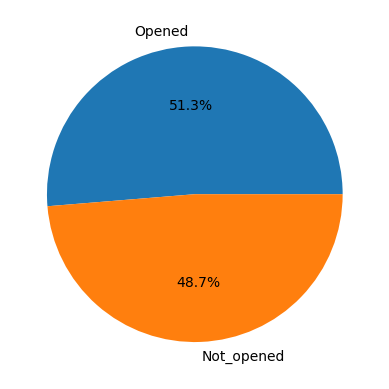

In [10]:
# Dataset is nearly Balanced
plt.pie(df_eda.Opened_Previous_Emails.value_counts(),labels=['Opened','Not_opened'],autopct='%1.1f%%')
plt.show()
plt.savefig('Distribution.png')

In [6]:
Categories = [i for i in df_eda.columns if df_eda[i].dtypes == 'O']
Numerical = [i for i in df_eda.columns if df_eda[i].dtypes !='O']
print(Categories,'\n\n\n',Numerical,)

['Opened_Previous_Emails', 'Clicked_Previous_Emails', 'Device_Type'] 


 ['Customer_Age', 'Emails_Opened', 'Emails_Clicked', 'Purchase_History', 'Time_Spent_On_Website', 'Days_Since_Last_Open', 'Customer_Engagement_Score']


array([[<Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Emails_Opened'}>,
        <Axes: title={'center': 'Emails_Clicked'}>],
       [<Axes: title={'center': 'Purchase_History'}>,
        <Axes: title={'center': 'Time_Spent_On_Website'}>,
        <Axes: title={'center': 'Days_Since_Last_Open'}>],
       [<Axes: title={'center': 'Customer_Engagement_Score'}>, <Axes: >,
        <Axes: >]], dtype=object)

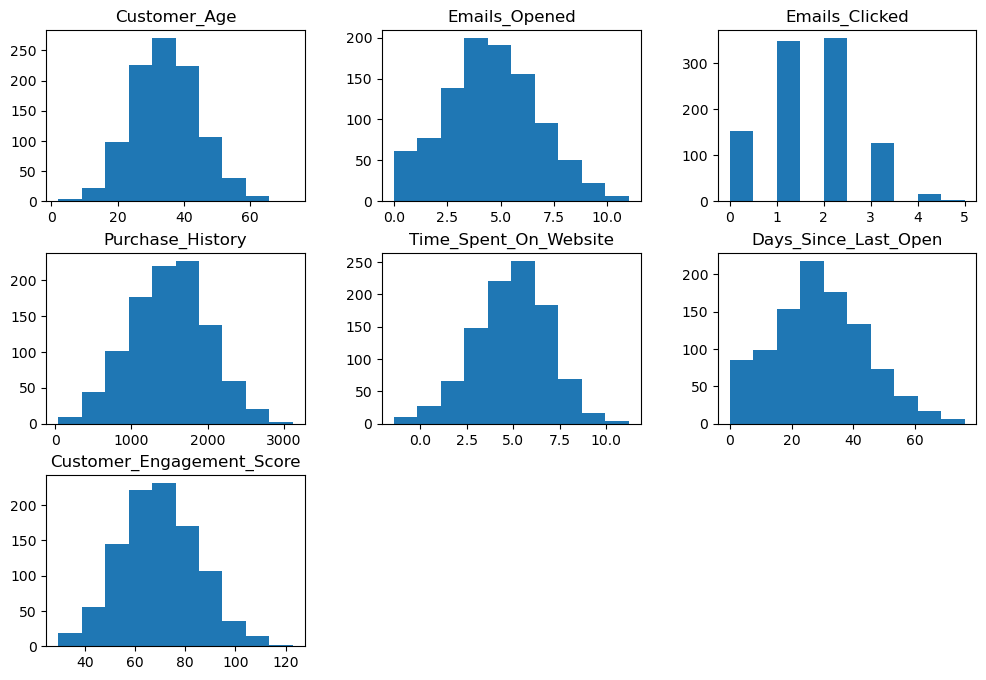

In [29]:
df_eda[Numerical].hist(grid=False,figsize=(12,8))

In [30]:
df_eda.skew(numeric_only=True)

Customer_Age                 0.110598
Emails_Opened                0.075364
Emails_Clicked               0.250537
Purchase_History            -0.002125
Time_Spent_On_Website       -0.175420
Days_Since_Last_Open         0.217842
Customer_Engagement_Score    0.118307
dtype: float64

# Outlier Detection

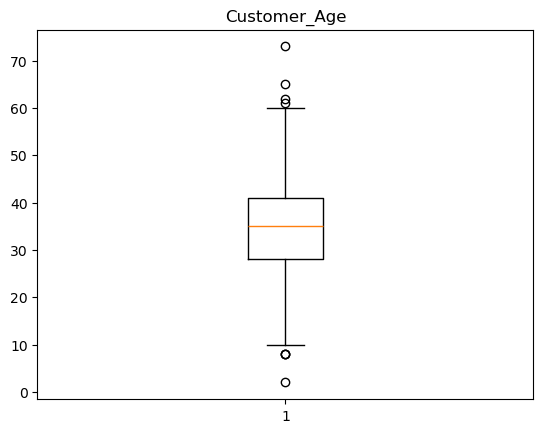

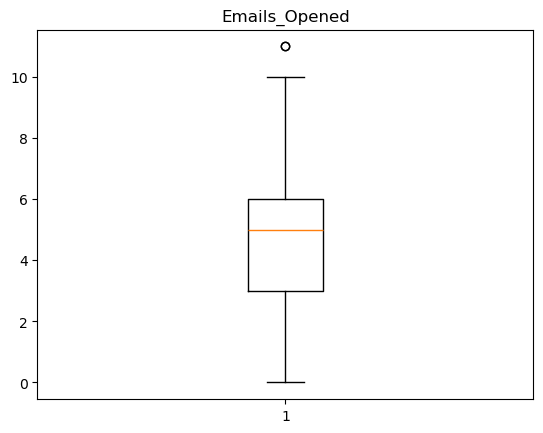

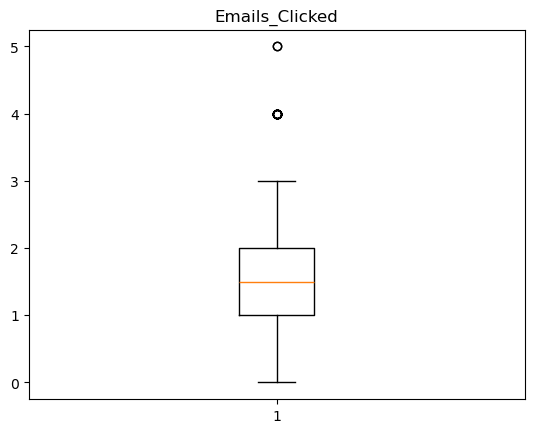

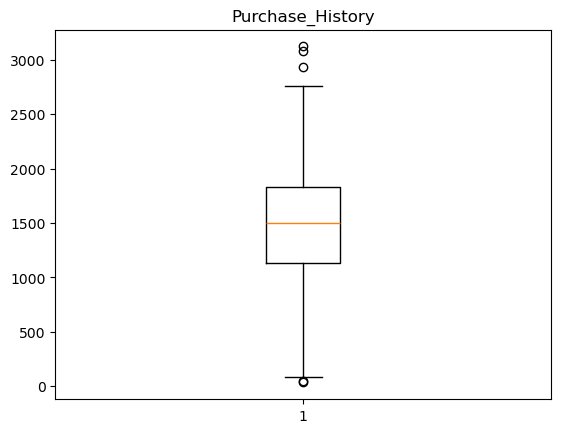

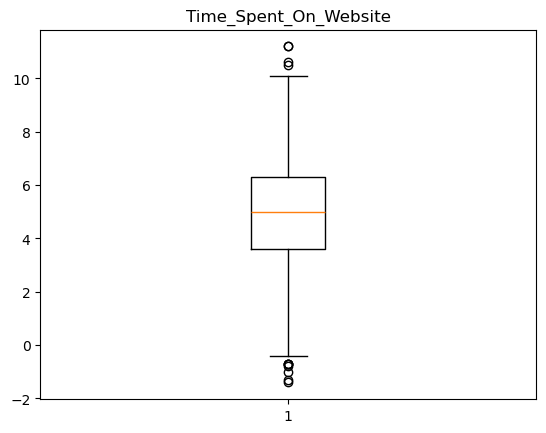

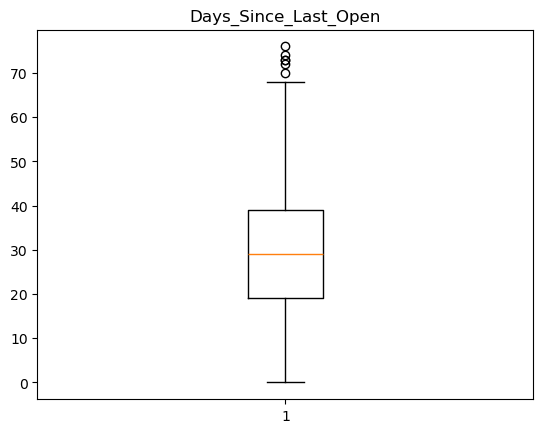

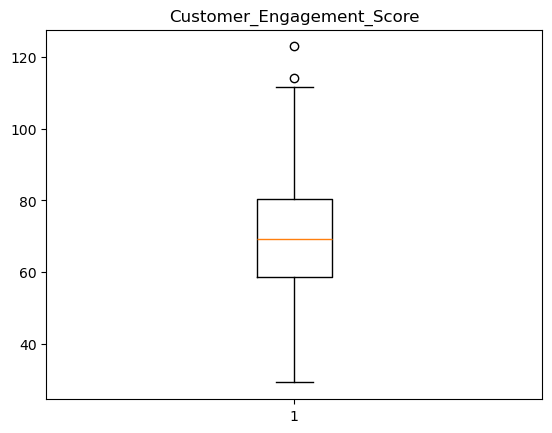

In [7]:
for feature in Numerical :
    plt.boxplot(df_eda[feature])
    plt.title(feature)
    plt.show()

In [ ]:
# outLiers in custemers age

In [20]:
for feature in Numerical :
    q1=df_eda[feature].quantile(0.25)
    q3=df_eda[feature].quantile(0.75)
    IQR=q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    outlier=[]
    for i in df_eda[feature]:
        if (i > upr_bound) or (i < lwr_bound) :
            outlier.append(i)
    print(f'outliers in feature {feature} are : {outlier}\n\n\n')
    outLiers= df_eda[(df_eda[feature]>upr_bound) | (df_eda[feature]<lwr_bound)]
    print(outLiers,end='\n\n\n')

outliers in feature Customer_Age are : [8, 62, 73, 2, 65, 8, 8, 61]



     Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
74              8              6               1            1133.5   
179            62              2               2            1757.8   
209            73              8               1            1725.6   
262             2              6               3            1047.7   
478            65              3               0            2076.8   
646             8              4               1            1629.3   
668             8              6               2            1428.9   
755            61              7               1             515.5   

     Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
74                     4.1                    33                       95.6   
179                    4.3                    30                       83.2   
209                    2.7                    30             

In [31]:
Opened = df_eda[df_eda.Opened_Previous_Emails=='Opened']
Not_Opened = df_eda[df_eda.Opened_Previous_Emails=='Not_Opened']

In [32]:
Opened.describe().T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
Customer_Age,35.183236,9.573602,8.0,29.0,35.0,42.0,73.0
Emails_Opened,4.651072,2.044687,0.0,3.0,5.0,6.0,11.0
Emails_Clicked,1.479532,0.958143,0.0,1.0,1.0,2.0,4.0
Purchase_History,1509.289669,522.888196,35.3,1130.3,1483.9,1869.8,3076.0
Time_Spent_On_Website,4.930409,2.010201,-1.4,3.7,5.0,6.3,11.2
Days_Since_Last_Open,29.276803,14.692200,0.0,20.0,29.0,39.0,76.0
Customer_Engagement_Score,68.512476,14.746450,30.7,57.7,68.6,77.6,109.6


In [33]:
Not_Opened.describe().T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
Customer_Age,34.137577,10.010260,2.0,27.00,35.0,41.00,62.0
Emails_Opened,4.657084,1.971887,0.0,3.00,5.0,6.00,10.0
Emails_Clicked,1.552361,0.975434,0.0,1.00,2.0,2.00,5.0
Purchase_History,1470.994456,503.350247,46.5,1134.05,1514.2,1786.95,3121.5
Time_Spent_On_Website,4.871253,1.961207,-1.0,3.60,4.9,6.20,11.2
Days_Since_Last_Open,28.605749,14.914868,0.0,18.00,28.0,39.00,74.0
Customer_Engagement_Score,70.700616,15.950440,29.3,59.80,69.9,82.30,122.9


In [38]:
#df_eda.loc[df_eda['Time_Spent_On_Website'] < 0, 'Time_Spent_On_Website'] = 0
#df_eda['Time_Spent_On_Website'] = df_eda['Time_Spent_On_Website'].apply(lambda x: 0 if x < 0 else x)
df_out = df_eda.copy()
df_out['Time_Spent_On_Website'] = df_out['Time_Spent_On_Website'].apply(lambda x: 0 if x < 0 else x)
df_out.head()

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,546.1,3.3,23,53.3,Not_Opened,Clicked,Mobile
1,33,6,1,1069.8,4.9,23,60.5,Opened,Not_clicked,Mobile
2,41,5,1,1293.2,5.0,3,55.9,Not_Opened,Not_clicked,Mobile
3,50,3,1,2443.8,5.9,25,61.8,Not_Opened,Clicked,Desktop
4,32,6,0,1778.3,2.3,40,66.8,Not_Opened,Not_clicked,Mobile


In [39]:
for feature in Numerical :
    q1=df_out[feature].quantile(0.25)
    q3=df_out[feature].quantile(0.75)
    IQR=q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    df_out.loc[df_out[feature]>upr_bound,feature]= upr_bound # loc[row,col]
    df_out.loc[df_out[feature]<lwr_bound,feature]=lwr_bound

C:\Users\dushy\AppData\Local\Temp\ipykernel_12716\2658835493.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '60.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[feature]>upr_bound,feature]= upr_bound # loc[row,col]
C:\Users\dushy\AppData\Local\Temp\ipykernel_12716\2658835493.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_out.loc[df_out[feature]>upr_bound,feature]= upr_bound # loc[row,col]
C:\Users\dushy\AppData\Local\Temp\ipykernel_12716\2658835493.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible

In [40]:
Opened = df_out[df_out.Opened_Previous_Emails=='Opened']
Not_Opened = df_out[df_out.Opened_Previous_Emails=='Not_Opened']

In [42]:
Opened.describe().T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
Customer_Age,35.152047,9.461594,8.500,29.0,35.0,42.0,60.500
Emails_Opened,4.649123,2.038852,0.000,3.0,5.0,6.0,10.500
Emails_Clicked,1.473684,0.944138,0.000,1.0,1.0,2.0,3.500
Purchase_History,1508.911550,521.365584,77.975,1130.3,1483.9,1869.8,2886.775
Time_Spent_On_Website,4.936745,1.979092,0.000,3.7,5.0,6.3,10.350
Days_Since_Last_Open,29.253411,14.624269,0.000,20.0,29.0,39.0,69.000
Customer_Engagement_Score,68.512476,14.746450,30.700,57.7,68.6,77.6,109.600


In [43]:
Not_Opened.describe().T.drop('count',axis=1)

,mean,std,min,25%,50%,75%,max
Customer_Age,34.147844,9.957766,8.500,27.00,35.0,41.00,60.500
Emails_Opened,4.657084,1.971887,0.000,3.00,5.0,6.00,10.000
Emails_Clicked,1.534908,0.931730,0.000,1.00,2.0,2.00,3.500
Purchase_History,1470.577105,501.695017,77.975,1134.05,1514.2,1786.95,2886.775
Time_Spent_On_Website,4.877105,1.935411,0.000,3.60,4.9,6.20,10.350
Days_Since_Last_Open,28.581109,14.844360,0.000,18.00,28.0,39.00,69.000
Customer_Engagement_Score,70.679055,15.886622,29.300,59.80,69.9,82.30,113.200


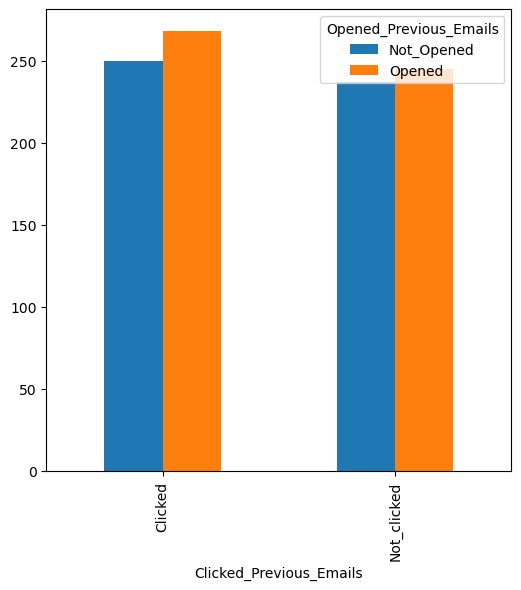

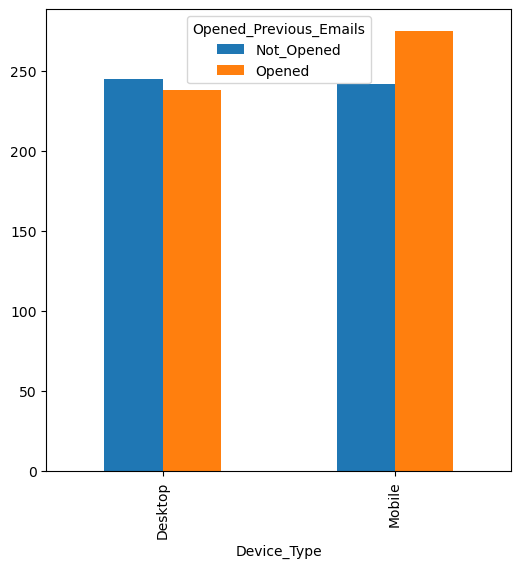

In [34]:
for col in Categories :
    if col != 'Opened_Previous_Emails' :
        pd.crosstab(df_eda[col],df_eda.Opened_Previous_Emails).plot(kind='bar',figsize=(6,6))

In [15]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

<Axes: >

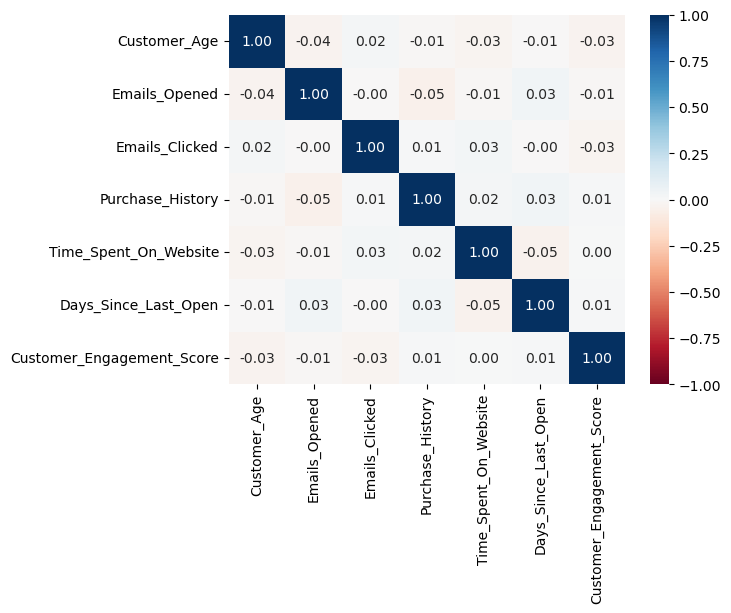

In [16]:
# HeatMap
sns.heatmap(df_eda.iloc[:,:-3].corr(),fmt='.2f',vmin=-1,vmax=1,cmap='RdBu',annot=True)

In [70]:
df_eda2 = df.copy()

In [71]:
# Add a new column at index 3 (second column)
df_eda2.insert(loc=3,column='POEC',value=df.Emails_Clicked/df.Emails_Opened)

In [72]:
df_eda2.head()

,Customer_Age,Emails_Opened,Emails_Clicked,POEC,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,0.142857,546.1,3.3,23,53.3,0,1,1
1,33,6,1,0.166667,1069.8,4.9,23,60.5,1,0,1
2,41,5,1,0.200000,1293.2,5.0,3,55.9,0,0,1
3,50,3,1,0.333333,2443.8,5.9,25,61.8,0,1,0
4,32,6,0,0.000000,1778.3,2.3,40,66.8,0,0,1


In [73]:
df_eda2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Age               1000 non-null   int64  
 1   Emails_Opened              1000 non-null   int64  
 2   Emails_Clicked             1000 non-null   int64  
 3   POEC                       999 non-null    float64
 4   Purchase_History           1000 non-null   float64
 5   Time_Spent_On_Website      1000 non-null   float64
 6   Days_Since_Last_Open       1000 non-null   int64  
 7   Customer_Engagement_Score  1000 non-null   float64
 8   Opened_Previous_Emails     1000 non-null   int64  
 9   Clicked_Previous_Emails    1000 non-null   int64  
 10  Device_Type                1000 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 86.1 KB


In [74]:
df_eda2.loc[df_eda2.POEC.isnull()]

,Customer_Age,Emails_Opened,Emails_Clicked,POEC,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
160,25,0,0,NaN,1196.7,5.0,34,72.2,1,1,0


In [75]:
df_eda2.loc[np.isinf(df_eda2.POEC)]

,Customer_Age,Emails_Opened,Emails_Clicked,POEC,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
61,33,0,1,inf,1333.6,5.6,45,80.8,0,0,0
101,30,0,1,inf,1927.8,3.4,37,73.5,0,0,1
151,38,0,3,inf,1315.4,7.3,17,56.7,0,1,1
289,28,0,3,inf,1356.0,6.2,43,65.3,1,1,0
346,20,0,1,inf,1357.8,4.9,25,63.5,0,1,0
355,24,0,2,inf,1417.2,6.4,43,66.5,0,0,1
539,29,0,2,inf,1419.8,6.5,44,54.7,0,1,1
562,43,0,1,inf,405.0,3.2,20,67.1,0,1,0
591,30,0,1,inf,1802.1,5.4,26,52.3,1,1,0
594,45,0,2,inf,2129.6,5.0,46,42.4,1,1,1


In [38]:
df_eda2.iloc[:,:-3].corr().round(2)

,Customer_Age,Emails_Opened,Emails_Clicked,POEC,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score
Customer_Age,1.00,-0.04,0.02,0.04,-0.01,-0.03,-0.01,-0.03
Emails_Opened,-0.04,1.00,-0.00,-0.52,-0.05,-0.01,0.03,-0.01
Emails_Clicked,0.02,-0.00,1.00,0.63,0.01,0.03,-0.00,-0.03
POEC,0.04,-0.52,0.63,1.00,0.04,-0.00,-0.01,-0.01
Purchase_History,-0.01,-0.05,0.01,0.04,1.00,0.02,0.03,0.01
Time_Spent_On_Website,-0.03,-0.01,0.03,-0.00,0.02,1.00,-0.05,0.00
Days_Since_Last_Open,-0.01,0.03,-0.00,-0.01,0.03,-0.05,1.00,0.01
Customer_Engagement_Score,-0.03,-0.01,-0.03,-0.01,0.01,0.00,0.01,1.00


In [50]:
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [53]:
X = df_eda.iloc[:,:-3]
colour_class = df_eda.loc[:,'Opened_Previous_Emails']

In [58]:
#TSNE visualization
data_tsne = TSNE(n_components=2).fit_transform(X)
cluster.tsneplot(score=data_tsne, colorlist=colour_class, legendpos='upper right')

In [77]:
df_eda2.replace({'POEC':{np.inf :0,np.nan:0}},inplace=True)
df_eda2.drop(labels=['Emails_Opened','Emails_Clicked'],axis=1,inplace=True)

In [78]:
x=df_eda2.iloc[:,:-3]
color_class = df_eda2.loc[:,'Opened_Previous_Emails']

In [79]:
data_tsne = TSNE(n_components=2).fit_transform(x)
cluster.tsneplot(score=data_tsne, colorlist=color_class, legendpos='upper right')